In [63]:
# Data loading and Cleaning

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv(r"D:\Oasis\Level 1 - Project 3\AB_NYC_2019.csv")
pd.set_option("display.max_columns", None)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [67]:
df.shape

(48895, 16)

In [68]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [69]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [70]:
df.isnull().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [71]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [72]:
# Replacing objects in the name columns that are empty with the value unknown.
# Replacing objects in the host names columns that are empty with the value unknown.
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

In [73]:
# Replacing objects in the last review columns that are empty with the value No reviews.
# Replacing objects in the reviews per month columns that are empty with the value 0.
df['last_review'].fillna('No Reviews', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

In [74]:
# Removing the duplicate columns from the data set.
df.drop_duplicates(inplace=True)

In [75]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [77]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No Reviews,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,1.090910e+00,1.597283e+00,0.00000,4.000000e-02,3.700000e-01,1.580000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [79]:
room_prices = df.groupby('room_type')['price'].mean()
print("Average Prices by Room Type:")
print(room_prices)

Average Prices by Room Type:
room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


In [80]:
max_room_prices = df.groupby(['neighbourhood_group', 'room_type'])['price'].max()
print("Maximum Prices by Room Type and Neighbourhood Group:")
print(max_room_prices)

Maximum Prices by Room Type and Neighbourhood Group:
neighbourhood_group  room_type      
Bronx                Entire home/apt     1000
                     Private room        2500
                     Shared room          800
Brooklyn             Entire home/apt    10000
                     Private room        7500
                     Shared room          725
Manhattan            Entire home/apt    10000
                     Private room        9999
                     Shared room         1000
Queens               Entire home/apt     2600
                     Private room       10000
                     Shared room         1800
Staten Island        Entire home/apt     5000
                     Private room         300
                     Shared room          150
Name: price, dtype: int64


In [81]:
min_room_prices = df[df['price'] > 0].groupby(['neighbourhood_group', 'room_type'])['price'].min()
print("Minimum Prices by Room Type (excluding zeros):")
print(min_room_prices)

Minimum Prices by Room Type (excluding zeros):
neighbourhood_group  room_type      
Bronx                Entire home/apt    28
                     Private room       10
                     Shared room        20
Brooklyn             Entire home/apt    10
                     Private room       10
                     Shared room        15
Manhattan            Entire home/apt    10
                     Private room       10
                     Shared room        10
Queens               Entire home/apt    10
                     Private room       10
                     Shared room        11
Staten Island        Entire home/apt    48
                     Private room       20
                     Shared room        13
Name: price, dtype: int64


In [82]:
filtered_df = df[df['number_of_reviews'] > 0]
neighborhood_reviews_sum = filtered_df.groupby('neighbourhood')['number_of_reviews'].sum()
most_reviews_neighborhood = df.groupby('neighbourhood')['number_of_reviews'].sum().idxmax()
print(f"Neighborhood with Most Reviews: {most_reviews_neighborhood}")
print()
least_reviews_neighborhood = neighborhood_reviews_sum.idxmin()
print(f"Neighborhood with Least Reviews (excluding zeros): {least_reviews_neighborhood}")

Neighborhood with Most Reviews: Bedford-Stuyvesant

Neighborhood with Least Reviews (excluding zeros): Bay Terrace, Staten Island


In [83]:
# Availability Between Different Room Types
avg_availability = df.groupby('room_type')['availability_365'].mean()
print("Average Availability by Room Type:")
print(avg_availability)

Average Availability by Room Type:
room_type
Entire home/apt    111.920304
Private room       111.203933
Shared room        162.000862
Name: availability_365, dtype: float64


In [84]:
# Availability Depending on the Neighborhood
avg_availability_neighborhood = df.groupby('neighbourhood_group')['availability_365'].mean()
print("Average Availability by Neighborhood:")
print(avg_availability_neighborhood)

Average Availability by Neighborhood:
neighbourhood_group
Bronx            165.758937
Brooklyn         100.232292
Manhattan        111.979410
Queens           144.451818
Staten Island    199.678284
Name: availability_365, dtype: float64


In [85]:
# Correlation Between Room Prices and Number of Reviews
correlation = df['price'].corr(df['number_of_reviews'])
print(f"Correlation between Room Prices and Number of Reviews: {correlation:.2f}")

Correlation between Room Prices and Number of Reviews: -0.05


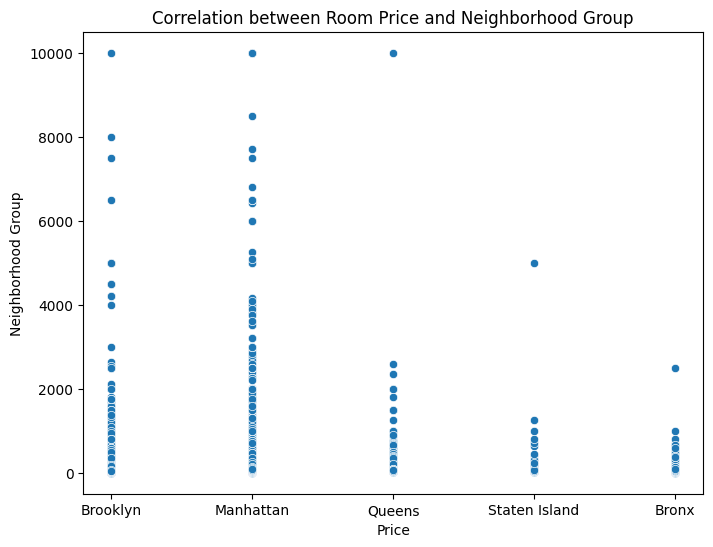

In [86]:
# Correlation between Room Price and Neighborhood
plt.figure(figsize=(8, 6))  
sns.scatterplot(y='price', x='neighbourhood_group', data=df)
plt.title("Correlation between Room Price and Neighborhood Group")
plt.xlabel("Price")
plt.ylabel("Neighborhood Group")
plt.show()

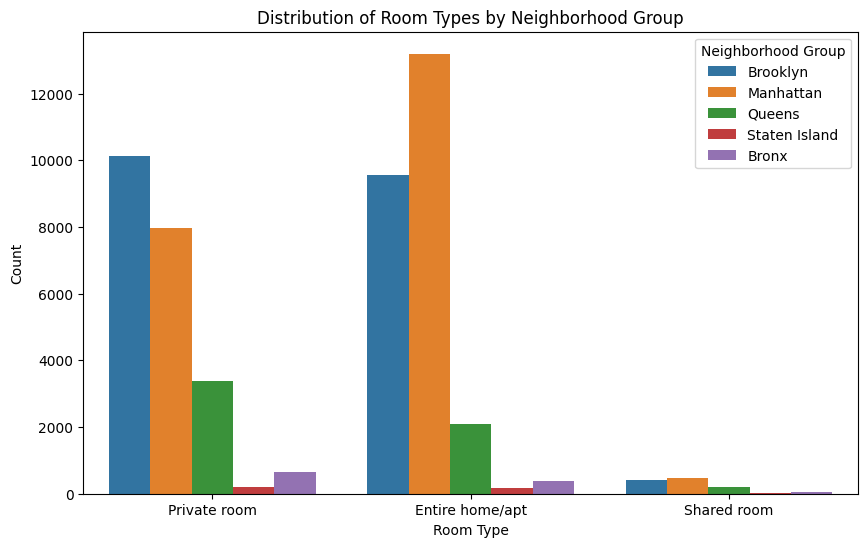

In [87]:
# Distribution of Room Types in Different Neighborhood Groups
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', hue='neighbourhood_group', data=df)
plt.title('Distribution of Room Types by Neighborhood Group')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Neighborhood Group')
plt.show()

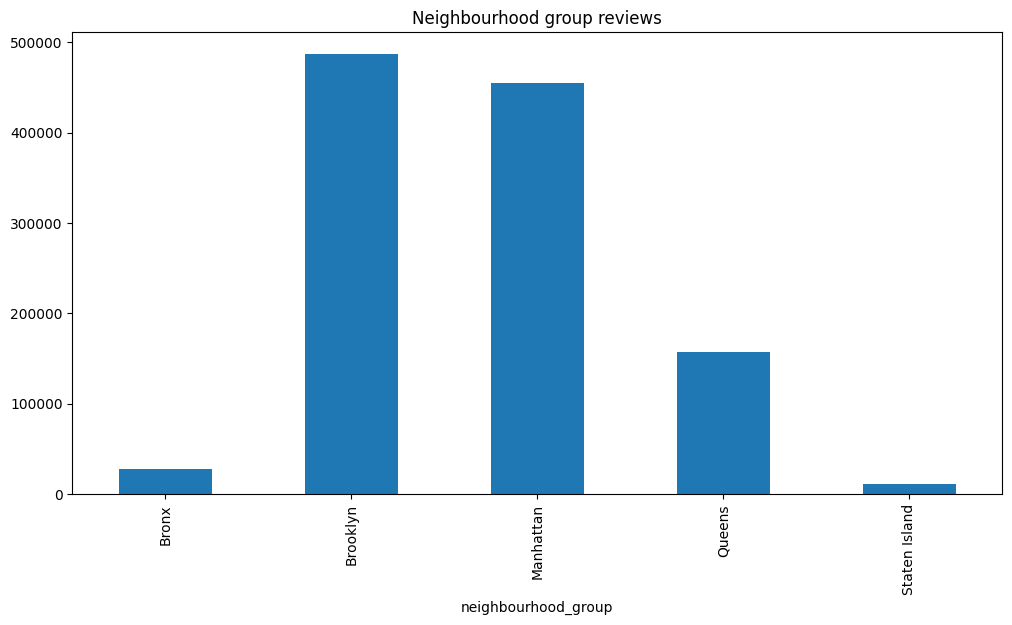

In [88]:
neighbourhood_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].sum()
plt.figure(figsize=(12,6))
neighbourhood_reviews.plot(kind= 'bar')
plt.title('Neighbourhood group reviews')
plt.show()

In [89]:
roomtype_reviews = df.groupby(['room_type'])['number_of_reviews'].mean()

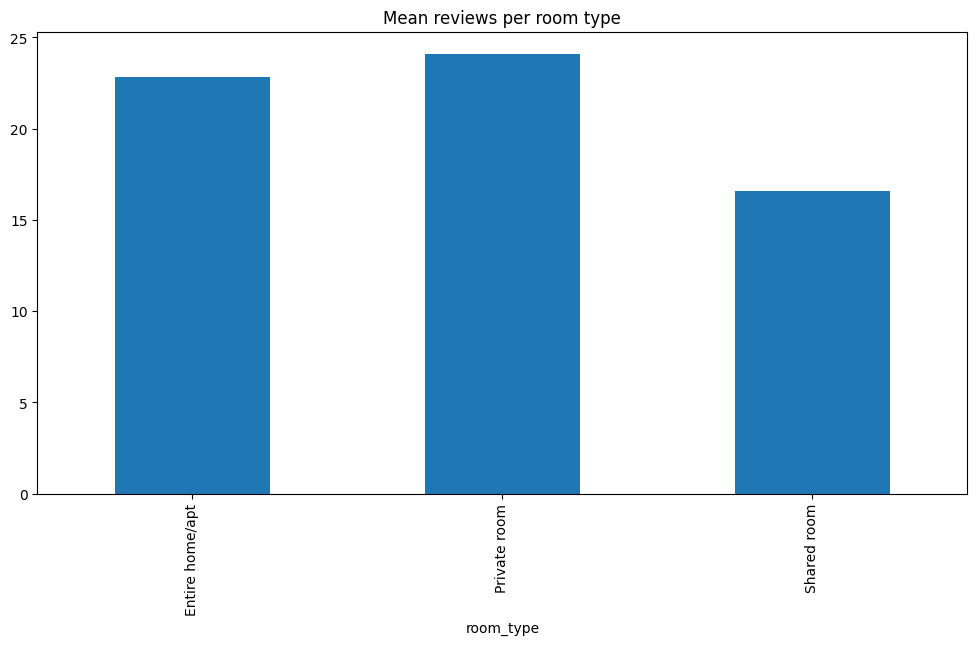

In [90]:
plt.figure(figsize=(12,6))
roomtype_reviews.plot(kind= 'bar')
plt.title('Mean reviews per room type')
plt.show()

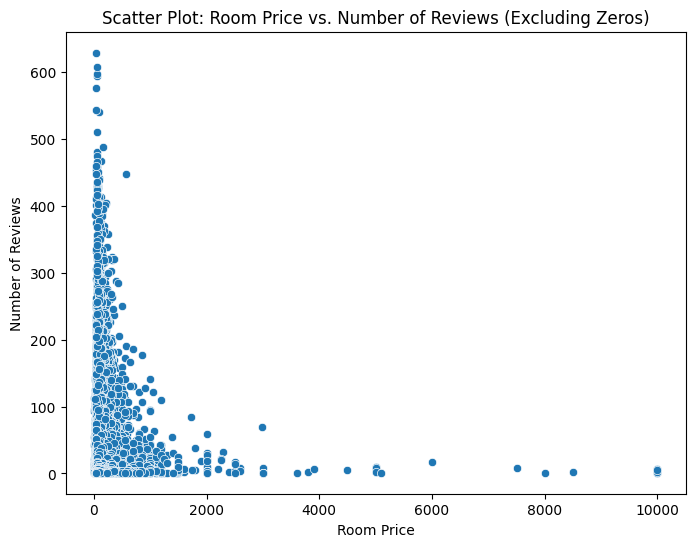

In [91]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=filtered_df)
plt.title('Scatter Plot: Room Price vs. Number of Reviews (Excluding Zeros)')
plt.xlabel('Room Price')
plt.ylabel('Number of Reviews')
plt.show()

In [92]:
# Conclusion
text1 = """
Insights:

1. The average price for an entire home/apartment is significantly higher than for private and shared rooms.
2. The maximum prices vary greatly by neighbourhood, with Manhattan and Brooklyn having the highest maximum 
   prices across all room types.
3. The minimum prices are relatively low and consistent across neighbourhoods, suggesting a competitive market 
   for budget accommodations.
4. Shared rooms have the highest average availability, which could indicate less demand or greater supply.
5. Staten Island has the highest average availability among neighbourhoods, which might be due to its location 
   or fewer tourists.

Correlation explanation:
The correlation coefficient between Room Prices and Number of Reviews is -0.5.
A value close to 0 implies a very weak negative relationship between the variables.
This means that as Room Prices increase, there is a slightly tendency for the Number of Reviews to decrease,
and vice versa.
However, the relationship is so weak that it is generally considered negligible.
"""

# Print the insights
print(text1)


Insights:

1. The average price for an entire home/apartment is significantly higher than for private and shared rooms.
2. The maximum prices vary greatly by neighbourhood, with Manhattan and Brooklyn having the highest maximum 
   prices across all room types.
3. The minimum prices are relatively low and consistent across neighbourhoods, suggesting a competitive market 
   for budget accommodations.
4. Shared rooms have the highest average availability, which could indicate less demand or greater supply.
5. Staten Island has the highest average availability among neighbourhoods, which might be due to its location 
   or fewer tourists.

Correlation explanation:
The correlation coefficient between Room Prices and Number of Reviews is -0.5.
A value close to 0 implies a very weak negative relationship between the variables.
This means that as Room Prices increase, there is a slightly tendency for the Number of Reviews to decrease,
and vice versa.
However, the relationship is so weak tha